
##Objetivo


O Objetivo desta análise exploratória dos dados (EDA) é entender melhor a base de clientes, identificar os padrões e tendências.
Através do EDA, podemos conhecer melhor a base de dados, tornando o processo de modelagem de crédito mais eficaz, contribuindo com o time de negocios na tomada de decisões.






## Case
POD Bank uma startup do setor financeiro que tem como núcleo de negócio crédito para as pessoas denominadas “Thin Files” ou traduzindo “pessoas sem informação de crédito”, esses indivíduos geralmente não usam o crédito regularmente e, portanto, não possuem um histórico de crédito. Segundo uma pesquisa realizada pela Serasa Experian, 35,3 milhões de brasileiros sem registros financeiros, isto é, 21,7% da população adulta, isso não significa que essas pessoas não têm dinheiro ou que não são boas pagadoras, muitas vezes pague tudo no subsídio ou tenha toda a parte de crédito no nome de algum familiar.

##Desafio do Projeto
Olhando este público, o POD Bank ganhou maturidade e crescimento em sua base de clientes, porém o Head de crédito está preocupado, pois embora a empresa esteja em crescimento, a inadimplência do mercado também está aumentando. **Portanto nosso desafio neste projeto é construir um modelo de crédito capaz de gerar uma pontuação de risco na contratação de seus produtos de crédito.**

##Foco do Projeto
O foco deste projeto é propor uma solução para um problema de negócio baseado em 3 pilares:

1- Aumento de faturamento

2- Redução de Custos

3- Melhoria na qualidade de vida das pessoas

Este projeto tem como finalidade construir um modelo de crédito capaz de gerar uma pontuação de risco na contratação de seus produtos de crédito.

---




## Configuração do Ambiente


Neste projeto,foram utilizadas algumas bibliotecas e ferramentas para processamento dos dados:

 **Apache Spark:**  É uma ferramenta para processamento de dados em grande escala,tem como vantagem a velocidade na execução de carga e de fácil manuseio.

**Pacotes Instalados:**



- PySpark: É a interface Python para interagir com o Apache Spark, realizando
e otimizando processamento de dados em larga escala.
- Pandas e NumPy: Bibliotecas utilizadas no ETL da base.
- Matplotlib e Seaborn: Utilização de recursos graficos para geração de insights da base.

Após as intalações, criei uma sessão Spark utilizando a classe SparkSession, passo essencial para poder interagir e executar o processamento de dados no ambiente Spark.




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install -q pyspark

#Criando a Sessão com o SparkSession

from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("EDA - CREDITO-BASE") \
    .config('spark.ui.port', '4050') \
    .getOrCreate()

spark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


##Leitura do Dataset em Spark e Pandas.

In [3]:
df_application_train = spark.read.csv ('/content/drive/MyDrive/0000- EBA/POD/Projeto 01/application_train.csv', header=True, inferSchema=True)
df_application_train.createOrReplaceTempView("df_application_train")

In [4]:
df_application_train = ('/content/drive/MyDrive/0000- EBA/POD/Projeto 01/application_train.csv')
df_application_train = pd.read_csv(df_application_train,sep = ',')

## Dicionário dos Dados

`SK_ID_CURR` : ID do empréstimo na nossa amostra

`TARGET` : Variável alvo (1 - cliente com dificuldades de pagamento: ele/ela teve atraso de pagamento por mais de X dias em pelo menos uma das primeiras Y parcelas do empréstimo em nossa amostra, 0 - todos os outros casos)

`NAME_CONTRACT_TYPE` : Identificação se o empréstimo é em dinheiro ou rotativo

`CODE_GENDER` : Gênero do cliente

`FLAG_OWN_CAR` : Sinalizador se o cliente possui um carro

`FLAG_OWN_REALTY` : Sinalizador se o cliente possui uma casa ou apartamento

`CNT_CHILDREN` : Número de filhos que o cliente tem

`AMT_INCOME_TOTAL` : Renda do cliente

`AMT_CREDIT` : Valor do crédito do empréstimo

`AMT_ANNUITY` : Anuidade do empréstimo

`AMT_GOODS_PRICE` : Para empréstimos ao consumidor, é o preço dos bens para os quais o empréstimo é concedido

`NAME_TYPE_SUITE` : Quem acompanhava o cliente quando ele solicitou o empréstimo

`NAME_INCOME_TYPE` : Tipo de renda dos clientes (empresário, trabalhador, licença maternidade, ...)

`NAME_EDUCATION_TYPE` : Nível de educação mais alto que o cliente alcançou

`NAME_FAMILY_STATUS` : Estado civil do cliente

`NAME_HOUSING_TYPE`  : Qual é a situação habitacional do cliente (alugando, morando com os pais, ...)

`REGION_POPULATION_RELATIVE` : População normalizada da região onde o cliente mora (número mais alto significa que o cliente mora em uma região mais populosa)

`DAYS_BIRTH` : Idade do cliente em dias no momento da aplicação

`DAYS_EMPLOYED` : Quantos dias antes da aplicação a pessoa começou o emprego atual

`DAYS_REGISTRATION` : Quantos dias antes da aplicação o cliente mudou seu registro

`DAYS_ID_PUBLISH` : Quantos dias antes da aplicação o cliente mudou o documento de identidade com o qual solicitou o empréstimo

`OWN_CAR_AGE` : Idade do carro do cliente

`FLAG_MOBIL` : O cliente forneceu telefone celular (1=SIM, 0=NÃO)

`FLAG_EMP_PHONE` : O cliente forneceu telefone comercial (1=SIM, 0=NÃO)

`FLAG_WORK_PHONE` : O cliente forneceu telefone residencial (1=SIM, 0=NÃO)

`FLAG_CONT_MOBILE` : O telefone celular do cliente era acessível (1=SIM, 0=NÃO)

`FLAG_PHONE` : O cliente forneceu telefone residencial (1=SIM, 0=NÃO)

`FLAG_EMAIL` : O cliente forneceu e-mail (1=SIM, 0=NÃO)

`OCCUPATION_TYPE` : Qual tipo de ocupação o cliente tem

`CNT_FAM_MEMBERS` : Quantos membros a família do cliente tem

`REGION_RATING_CLIENT` : Nossa classificação da região onde o cliente mora (1,2,3)

`REGION_RATING_CLIENT_W_CITY` : Nossa classificação da região onde o cliente mora, levando em consideração a cidade (1,2,3)

`WEEKDAY_APPR_PROCESS_START` : Em qual dia da semana o cliente solicitou o empréstimo

`HOUR_APPR_PROCESS_START` : Aproximadamente em que hora o cliente solicitou o empréstimo

`REG_REGION_NOT_LIVE_REGION` : Sinalizador se o endereço permanente do cliente não corresponde ao endereço de contato (1=diferente, 0=igual, no nível regional)

`REG_REGION_NOT_WORK_REGION` : Sinalizador se o endereço permanente do cliente não corresponde ao endereço de trabalho (1=diferente, 0=igual, no nível regional)

`LIVE_REGION_NOT_WORK_REGION` : Sinalizador se o endereço de contato do cliente não corresponde ao endereço de trabalho (1=diferente, 0=igual, no nível regional)

`REG_CITY_NOT_LIVE_CITY` : Sinalizador se o endereço permanente do cliente não corresponde ao endereço de contato (1=diferente, 0=igual, no nível da cidade)

`REG_CITY_NOT_WORK_CITY` : Sinalizador se o endereço permanente do cliente não corresponde ao endereço de trabalho (1=diferente, 0=igual, no nível da cidade)

`LIVE_CITY_NOT_WORK_CITY` : Sinalizador se o endereço de contato do cliente não corresponde ao endereço de trabalho (1=diferente, 0=igual, no nível da cidade)

`ORGANIZATION_TYPE` : Tipo de organização onde o cliente trabalha

`EXT_SOURCE_1` : Pontuação normalizada de fonte de dados externa

`EXT_SOURCE_2` : Pontuação normalizada de fonte de dados externa

`EXT_SOURCE_3` : Pontuação normalizada de fonte de dados externa

`APARTMENTS_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`BASEMENTAREA_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`YEARS_BEGINEXPLUATATION_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`YEARS_BUILD_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`COMMONAREA_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`ELEVATORS_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`ENTRANCES_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`FLOORSMAX_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`FLOORSMIN_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`LANDAREA_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`LIVINGAPARTMENTS_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`LIVINGAREA_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`NONLIVINGAPARTMENTS_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`NONLIVINGAREA_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`APARTMENTS_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`BASEMENTAREA_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`YEARS_BEGINEXPLUATATION_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`YEARS_BUILD_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`COMMONAREA_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`ELEVATORS_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`ENTRANCES_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`FLOORSMAX_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`FLOORSMIN_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`LANDAREA_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`LIVINGAPARTMENTS_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`LIVINGAREA_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`NONLIVINGAPARTMENTS_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`NONLIVINGAREA_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`APARTMENTS_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`BASEMENTAREA_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`YEARS_BEGINEXPLUATATION_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`YEARS_BUILD_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`COMMONAREA_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`ELEVATORS_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`ENTRANCES_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`FLOORSMAX_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`FLOORSMIN_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`LANDAREA_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`LIVINGAPARTMENTS_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`LIVINGAREA_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`NONLIVINGAPARTMENTS_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`NONLIVINGAREA_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`FONDKAPREMONT_MODE` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`HOUSETYPE_MODE` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`TOTALAREA_MODE` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`WALLSMATERIAL_MODE` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`EMERGENCYSTATE_MODE` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`OBS_30_CNT_SOCIAL_CIRCLE` : Quantas observações do círculo social do cliente são observáveis com 30 DPD (dias de atraso)

`DEF_30_CNT_SOCIAL_CIRCLE` : Quantas observações do círculo social do cliente entraram em default em 30 DPD (dias de atraso)

`OBS_60_CNT_SOCIAL_CIRCLE` : Quantas observações do círculo social do cliente são observáveis com 60 DPD (dias de atraso)

`DEF_60_CNT_SOCIAL_CIRCLE` : Quantas observações do círculo social do cliente entraram em default em 60 DPD (dias de atraso)

`DAYS_LAST_PHONE_CHANGE` : Quantos dias antes da aplicação o cliente mudou de telefone

`FLAG_DOCUMENT_2` : O cliente forneceu o documento 2

`FLAG_DOCUMENT_3` : O cliente forneceu o documento 3

`FLAG_DOCUMENT_4` : O cliente forneceu o documento 4

`FLAG_DOCUMENT_5`: O cliente forneceu o documento 5

`FLAG_DOCUMENT_6` : O cliente forneceu o documento 6

`FLAG_DOCUMENT_7` : O cliente forneceu o documento 7

`FLAG_DOCUMENT_8` : O cliente forneceu o documento 8

`FLAG_DOCUMENT_9` : O cliente forneceu o documento 9

`FLAG_DOCUMENT_10` : O cliente forneceu o documento 10

`FLAG_DOCUMENT_11` : O cliente forneceu o documento 11

`FLAG_DOCUMENT_12` : O cliente forneceu o documento 12

`FLAG_DOCUMENT_13` : O cliente forneceu o documento 13

`FLAG_DOCUMENT_14` : O cliente forneceu o documento 14

`FLAG_DOCUMENT_15` : O cliente forneceu o documento 15

`FLAG_DOCUMENT_16` : O cliente forneceu o documento 16

`FLAG_DOCUMENT_17` : O cliente forneceu o documento 17

`FLAG_DOCUMENT_18` : O cliente forneceu o documento 18

`FLAG_DOCUMENT_19` : O cliente forneceu o documento 19

`FLAG_DOCUMENT_20` : O cliente forneceu o documento 20

`FLAG_DOCUMENT_21` : O cliente forneceu o documento 21

`AMT_REQ_CREDIT_BUREAU_HOUR` : Número de consultas ao Credit Bureau sobre o cliente uma hora antes da aplicação

`AMT_REQ_CREDIT_BUREAU_DAY` : Número de consultas ao Credit Bureau sobre o cliente um dia antes da aplicação (excluindo uma hora antes da aplicação)

`AMT_REQ_CREDIT_BUREAU_WEEK` : Número de consultas ao Credit Bureau sobre o cliente uma semana antes da aplicação (excluindo um dia antes da aplicação)

`AMT_REQ_CREDIT_BUREAU_MON` : Número de consultas ao Credit Bureau sobre o cliente um mês antes da aplicação (excluindo uma semana antes da aplicação)

`AMT_REQ_CREDIT_BUREAU_QRT` : Número de consultas ao Credit Bureau sobre o cliente 3 meses antes da aplicação (excluindo um mês antes da aplicação)

`AMT_REQ_CREDIT_BUREAU_YEAR` : Número de consultas ao Credit Bureau sobre o cliente um ano antes (excluindo os últimos 3 meses antes da aplicação)

Deletei algumas colunas que julguei não ser necessária para está primeira etapa de análise exploratória dos dados.

In [5]:
# Lista das colunas a serem excluídas
colunas_a_excluir = [
    "APARTMENTS_AVG",
    "BASEMENTAREA_AVG",
    "YEARS_BEGINEXPLUATATION_AVG",
    "YEARS_BUILD_AVG",
    "COMMONAREA_AVG",
    "ELEVATORS_AVG",
    "ENTRANCES_AVG",
    "FLOORSMAX_AVG",
    "FLOORSMIN_AVG",
    "LANDAREA_AVG",
    "LIVINGAPARTMENTS_AVG",
    "LIVINGAREA_AVG",
    "NONLIVINGAPARTMENTS_AVG",
    "NONLIVINGAREA_AVG",
    "APARTMENTS_MODE",
    "BASEMENTAREA_MODE",
    "YEARS_BEGINEXPLUATATION_MODE",
    "YEARS_BUILD_MODE",
    "COMMONAREA_MODE",
    "OWN_CAR_AGE",
    "ELEVATORS_MODE",
    "ENTRANCES_MODE",
    "FLOORSMAX_MODE",
    "FLOORSMIN_MODE",
    "LANDAREA_MODE",
    "LIVINGAPARTMENTS_MODE",
    "LIVINGAREA_MODE",
    "NONLIVINGAPARTMENTS_MODE",
    "NONLIVINGAREA_MODE",
    "APARTMENTS_MEDI",
    "BASEMENTAREA_MEDI",
    "YEARS_BEGINEXPLUATATION_MEDI",
    "YEARS_BUILD_MEDI",
    "COMMONAREA_MEDI",
    "ELEVATORS_MEDI",
    "ENTRANCES_MEDI",
    "FLOORSMAX_MEDI",
    "FLOORSMIN_MEDI",
    "LANDAREA_MEDI",
    "LIVINGAPARTMENTS_MEDI",
    "LIVINGAREA_MEDI",
    "NONLIVINGAPARTMENTS_MEDI",
    "NONLIVINGAREA_MEDI",
    "FONDKAPREMONT_MODE",
    "HOUSETYPE_MODE",
    "TOTALAREA_MODE",
    "WALLSMATERIAL_MODE",
    "EMERGENCYSTATE_MODE",
    "OBS_30_CNT_SOCIAL_CIRCLE",
    "DEF_30_CNT_SOCIAL_CIRCLE",
    "OBS_60_CNT_SOCIAL_CIRCLE",
    "DEF_60_CNT_SOCIAL_CIRCLE",
    "DAYS_LAST_PHONE_CHANGE",
    "FLAG_DOCUMENT_2",
    "FLAG_DOCUMENT_3",
    "FLAG_DOCUMENT_4",
    "FLAG_DOCUMENT_5",
    "FLAG_DOCUMENT_6",
    "FLAG_DOCUMENT_7",
    "FLAG_DOCUMENT_8",
    "FLAG_DOCUMENT_9",
    "FLAG_DOCUMENT_10",
    "FLAG_DOCUMENT_11",
    "FLAG_DOCUMENT_12",
    "FLAG_DOCUMENT_13",
    "FLAG_DOCUMENT_14",
    "FLAG_DOCUMENT_15",
    "FLAG_DOCUMENT_16",
    "FLAG_DOCUMENT_17",
    "FLAG_DOCUMENT_18",
    "FLAG_DOCUMENT_19",
    "FLAG_DOCUMENT_20",
    "FLAG_DOCUMENT_21"
]

# DataFrame resultante com as colunas excluídas
df_application_train_V1 = df_application_train.drop(columns=colunas_a_excluir)



In [6]:
 #Salvar o DataFrame resultante em um novo arquivo, se necessário
df_application_train_V1.to_csv("application_train_V1.csv", index=False)

In [7]:
df_application_train_V1 = df_application_train.copy()

In [13]:
df_application_train_V1 = spark.read.csv ('/content/application_train_V1.csv', header=True, inferSchema=True)
df_application_train_V1.createOrReplaceTempView("df_application_train_V1")

In [14]:
df_application_train_V1 = ('/content/application_train_V1.csv')
df_application_train_V1 = pd.read_csv(df_application_train_V1,sep = ',')

## Metadados

**Verificando o tipo dos dados**

Etapa inicial de qualquer projeto, neste momento é possivel identificar os tipos de variaveis que temos e se é preciso fazer alguma trativa.

In [10]:
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata = metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

generate_metadata(df_application_train_V1)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,SK_ID_CURR,int64,0,0.00,215257
1,FLAG_MOBIL,int64,0,0.00,2
2,FLAG_EMP_PHONE,int64,0,0.00,2
3,FLAG_WORK_PHONE,int64,0,0.00,2
4,FLAG_CONT_MOBILE,int64,0,0.00,2
...,...,...,...,...,...
94,NAME_HOUSING_TYPE,object,0,0.00,6
95,OCCUPATION_TYPE,object,67409,31.32,18
96,ORGANIZATION_TYPE,object,0,0.00,58
97,NAME_TYPE_SUITE,object,913,0.42,7


In [11]:
# Estatística descritiva completa
df_application_train_V1.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50
count,215257.000000,215257.000000,215257,215257,215257,215257,215257.000000,2.152570e+05,2.152570e+05,215249.000000,...,2.152570e+05,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,194663,141565,141832,149519,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278236.387137,0.080889,NaN,NaN,NaN,NaN,0.416637,1.685568e+05,5.994960e+05,27119.681762,...,5.000397e-01,0.500387,0.499759,0.499714,0.500411,0.500602,0.499781,0.500618,0.499476,0.499538
std,102885.029589,0.272666,NaN,NaN,NaN,NaN,0.719695,1.058557e+05,4.028989e+05,14522.021876,...,2.886308e-01,0.288874,0.288854,0.288689,0.288678,0.288052,0.288411,0.288286,0.288685,0.288505
min,100003.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,4.701627e-08,0.000002,0.000010,0.000005,0.000016,0.000004,0.000008,0.000010,0.000017,0.000006
25%,189025.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16506.000000,...,2.503571e-01,0.249831,0.249154,0.250009,0.250346,0.251720,0.249971,0.250336,0.248878,0.249740
50%,278215.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.440000e+05,5.148675e+05,24903.000000,...,4.999917e-01,0.500096,0.500020,0.500167,0.500267,0.500931,0.499138,0.502229,0.499258,0.499035
75%,367388.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34650.000000,...,7.496017e-01,0.750930,0.749430,0.749317,0.750656,0.750341,0.749475,0.749817,0.749368,0.748715


## Análise Exploratória de Dados (EDA)

**Objetivo:**
Realizar uma análise exploratória dos dados (EDA) da tabela principal do conjunto de dados disponibilizado com o intuito de entender melhor os padrões, tendências, e preparar o terreno para a modelagem.

# Tipos de dados
Para analisar os dados mais detalhadamente vamos conhecer melhor as variaveis:


###Quantidade de contratos na base de dados

In [17]:
spark.sql("""
select
  count(SK_ID_CURR) as COUNT_ID
from
  df_application_train_V1
""").show()

+--------+
|COUNT_ID|
+--------+
|  215257|
+--------+



###Análise da Variável Target
Realizei uma consulta SQL para a variável `TARGET` que determina a porcentagem de "bons" e "maus" clientes na base de dados, esta variavel clusteriza os clientes em:


*  0  Significa Bom Pagador
*  1  Significa Ruim Pagador




In [19]:
resultado_target=spark.sql("""
select
  TARGET,
  count(*) as TOTAL,
  round(count(*)* 100/ (select count(*)from df_application_train_V1),2) as PORCENTAGEM
from
  df_application_train_V1
group by
  TARGET;
""").show()

+------+------+-----------+
|TARGET| TOTAL|PORCENTAGEM|
+------+------+-----------+
|     1| 17412|       8.09|
|     0|197845|      91.91|
+------+------+-----------+



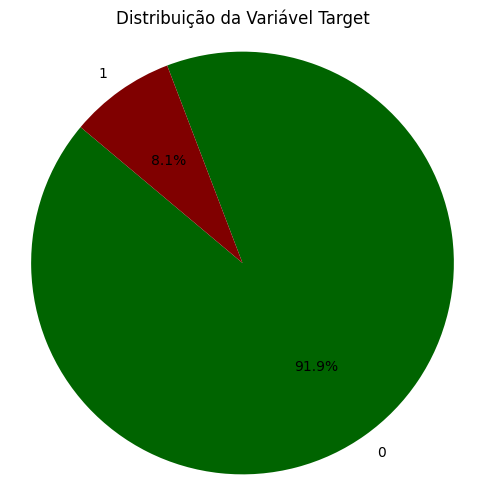

In [20]:
# Contar os valores únicos da variável target
contagem_target = df_application_train_V1['TARGET'].value_counts()

# Preparar os dados para o gráfico de pizza
labels = contagem_target.index
sizes = contagem_target.values

# Cores personalizadas
cores = '#006400','#800000'
#0B86E3 #1B365C
# Criar o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=cores)
plt.title('Distribuição da Variável Target')
plt.axis('equal')  # Garante que o gráfico seja um círculo
plt.show()


Na base de dados, a maioria dos clientes é clusterizada como **"bons pagadores", representando 92 % do total** (TARGET 0), enquanto cerca de 9% são identificados como "maus pagadores" (TARGET 1).

### Análise da Variável Idade

In [22]:
spark.sql("""
select
    min(round(abs(DAYS_BIRTH) / 365, 0)) as MIN_IDADE,
    round(avg(round(abs(DAYS_BIRTH) / 365, 2)),0) as MEDIA_IDADE,
    max(round(abs(DAYS_BIRTH) / 365, 0)) as MAX_IDADE
from
    df_application_train_V1
""").show()


+---------+-----------+---------+
|MIN_IDADE|MEDIA_IDADE|MAX_IDADE|
+---------+-----------+---------+
|     21.0|       44.0|     69.0|
+---------+-----------+---------+



A base de clientes apresenta range de idades bem abrangente, temos um publico com diversas faixas etárias.

Levantamento da hipotese de relação entre idade e inadimplência?




####Análise da Relação da Idade com Target
Para responder a hipotese acima, foi realizado uma consulta para entender a relação entre idade e o Target.

In [23]:
df_idade_target = spark.sql("""
select
  TARGET,
   case
        when AGE >= 20 and age < 30 then '20-29'
        when AGE >= 30 and age < 40 then '30-39'
        when AGE >= 40 and age < 50 then '40-49'
        when AGE >= 50 and age < 60 then '50-59'
        else '60+'
    end as FAIXA_IDADE,
    count(*) as QUANT_CLIENTES
from (
    select
        TARGET,
        round(abs(DAYS_BIRTH) / 365) as AGE
    from
        df_application_train_V1
) temp
group by
    TARGET,
    FAIXA_IDADE
order by
    TARGET,
    FAIXA_IDADE
""")
df_idade_target.show()


+------+-----------+--------------+
|TARGET|FAIXA_IDADE|QUANT_CLIENTES|
+------+-----------+--------------+
|     0|      20-29|         25480|
|     0|      30-39|         51817|
|     0|      40-49|         49968|
|     0|      50-59|         44753|
|     0|        60+|         25827|
|     1|      20-29|          3337|
|     1|      30-39|          5558|
|     1|      40-49|          4218|
|     1|      50-59|          2936|
|     1|        60+|          1363|
+------+-----------+--------------+



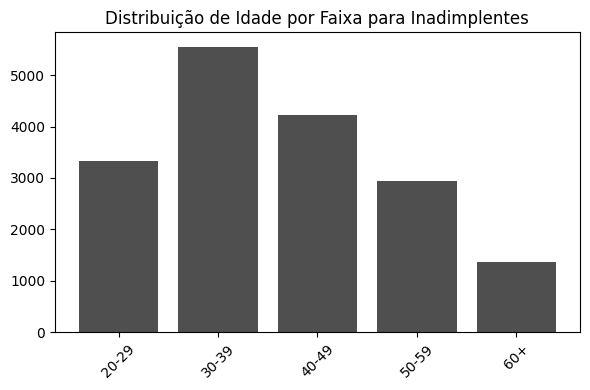

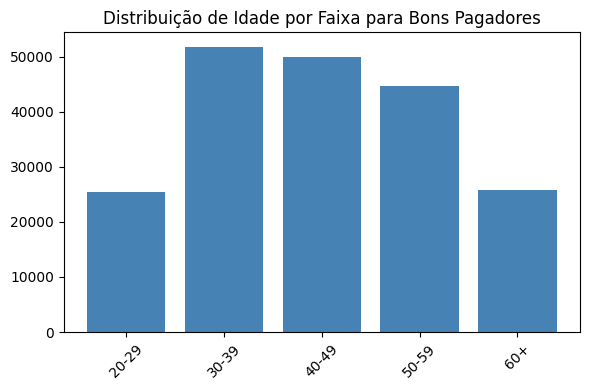

In [25]:
# Filtrar os dados para o alvo 1
df_idade_target1 = df_idade_target.filter(df_idade_target['TARGET'] == 1)

# Extrair os dados do DataFrame
faixas_idade = df_idade_target1.select('FAIXA_IDADE').rdd.flatMap(lambda x: x).collect()
quantidades_clientes = df_idade_target1.select('QUANT_CLIENTES').rdd.flatMap(lambda x: x).collect()

# Criar o gráfico de barras

plt.figure(figsize=(6, 4))
plt.bar(faixas_idade, quantidades_clientes, color='#4F4F4F')
plt.title('Distribuição de Idade por Faixa para Inadimplentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Filtrar os dados para o alvo 0
df_idade_target1 = df_idade_target.filter(df_idade_target['TARGET'] == 0)

# Extrair os dados do DataFrame
faixas_idade = df_idade_target1.select('FAIXA_IDADE').rdd.flatMap(lambda x: x).collect()
quantidades_clientes = df_idade_target1.select('QUANT_CLIENTES').rdd.flatMap(lambda x: x).collect()

# Criar o gráfico de barras

plt.figure(figsize=(6, 4))
plt.bar(faixas_idade, quantidades_clientes, color='#4682B4')
plt.title('Distribuição de Idade por Faixa para Bons Pagadores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


A faixa etária com mais clientes inadimplentes está na faixa de 30-39 anos, representando 32% da base total de inadimplentes

Aqui temos um ponto de atenção, pois 27% da base total de clientes esta nesta faixa.



###Análise da Variável Tipo de Contrato

In [33]:
df_tipo_contrato = spark.sql("""
select
  NAME_CONTRACT_TYPE,
  count(*) as tipo_contrato,
  round(count(*)* 100/ (select count(*)from df_application_train),2) as PORCENTAGEM
from
  df_application_train_V1
group by
  NAME_CONTRACT_TYPE;
""")
df_tipo_contrato.show()

+------------------+-------------+-----------+
|NAME_CONTRACT_TYPE|tipo_contrato|PORCENTAGEM|
+------------------+-------------+-----------+
|   Revolving loans|        20594|       9.57|
|        Cash loans|       194663|      90.43|
+------------------+-------------+-----------+



**Revolving Loans:** Crédito concedido através de um cartão de créditocom prazo de renovação.

**Cash Loans** Modalidade de emprestimo em dinheiro.

####Visualização da Variável Tipo de Contrato

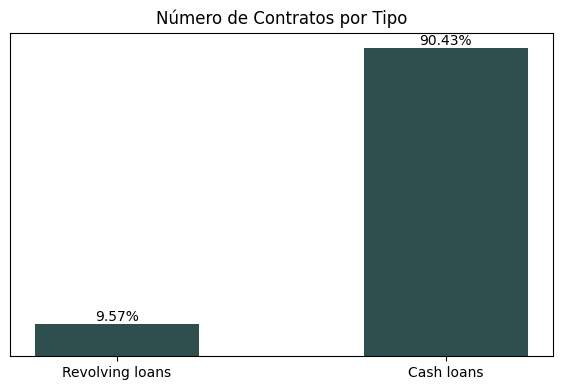

In [40]:
# Obter os resultados da consulta
df_tipo_contrato01 = df_tipo_contrato.toPandas()

# Criar o gráfico de barras
plt.figure(figsize=(6, 4))
barras = plt.bar(df_tipo_contrato01['NAME_CONTRACT_TYPE'], df_tipo_contrato01['PORCENTAGEM'], color='#2F4F4F',width=0.5)

# Adicionar as porcentagens em cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura, f'{altura}%', ha='center', va='bottom')

# Definir rótulos e título

plt.title('Número de Contratos por Tipo')

# Ajustar o layout
plt.xticks(rotation=0)
plt.tight_layout()
# Remover rótulos do eixo x
plt.yticks([])
# Exibir o gráfico
plt.show()

####Análise da Relação entre Tipo de Contrato e Target



A consulta em SQL abaixo, foi realizada para entender a relação entre o tipo de contrato e o Target de Bom Pagadores(Target 0) ou Inadimplentes(Tarent 1), calculando a porcentagem da variável para cada tipo de contrato.



In [35]:
df_contrato_target = spark.sql("""
select
    NAME_CONTRACT_TYPE,
    TARGET,
    count(*) as QUANT_CLIENTES,
    round(count(*) * 100 / sum(count(*)) over (partition by NAME_CONTRACT_TYPE), 2) as PORCENTAGEM
from
    df_application_train_V1
group by
    NAME_CONTRACT_TYPE,
    TARGET
""")
df_contrato_target.show()

+------------------+------+--------------+-----------+
|NAME_CONTRACT_TYPE|TARGET|QUANT_CLIENTES|PORCENTAGEM|
+------------------+------+--------------+-----------+
|        Cash loans|     0|        178371|      91.63|
|        Cash loans|     1|         16292|       8.37|
|   Revolving loans|     1|          1120|       5.44|
|   Revolving loans|     0|         19474|      94.56|
+------------------+------+--------------+-----------+



####Visualização da Variável Tipo de Contrato em Relação ao Target

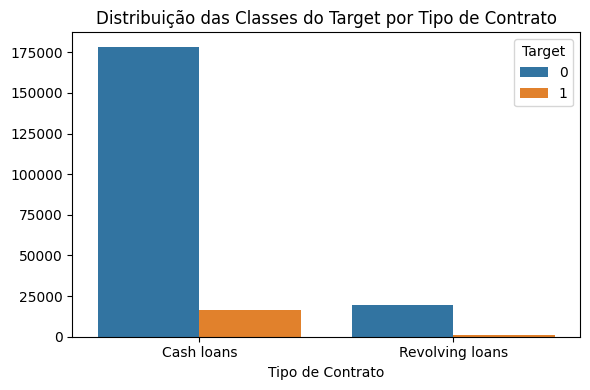

In [39]:
# Converter o DataFrame Spark para um DataFrame Pandas
df_contrato_target01 = df_contrato_target.toPandas()

# Plotar o gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(data=df_contrato_target01, x='NAME_CONTRACT_TYPE', y='QUANT_CLIENTES', hue='TARGET')

# Definir título
plt.title('Distribuição das Classes do Target por Tipo de Contrato')

# Remover os títulos dos eixos x e y
plt.xlabel('Tipo de Contrato')
plt.ylabel('')

# Mostrar o gráfico
plt.xticks(rotation=0)
plt.legend(title='Target', loc='upper right')
plt.tight_layout()
plt.show()





A modalidade de crédito cash loans representa 90% dos contratos, uma hipotese é a modalidade revolving não ser tão conhecida e possui juros mais altos.

Como a maioria da base de clientes que utilizam a modalidade cash loans, tem,os também uma grande concentração de clientes inadimplêntes(8%)

###Análise da Variável Renda Total

Essa consulta analise a media, minimo maximo da renda do cliente, retirando um missing values de '1.35E7'

In [42]:
spark.sql("""
select
    round(avg(AMT_INCOME_TOTAL),2) as MED_RENDA,
    round(min(AMT_INCOME_TOTAL),2) as MIN_RENDA,
    round(max(AMT_INCOME_TOTAL),2) as MAX_RENDA
from
    df_application_train_V1
where
    AMT_INCOME_TOTAL != '1.35E7'
""").show()

+---------+---------+---------+
|MED_RENDA|MIN_RENDA|MAX_RENDA|
+---------+---------+---------+
|168494.92|  25650.0|9000000.0|
+---------+---------+---------+



####Visualização da Relação entre Renda Total e Target



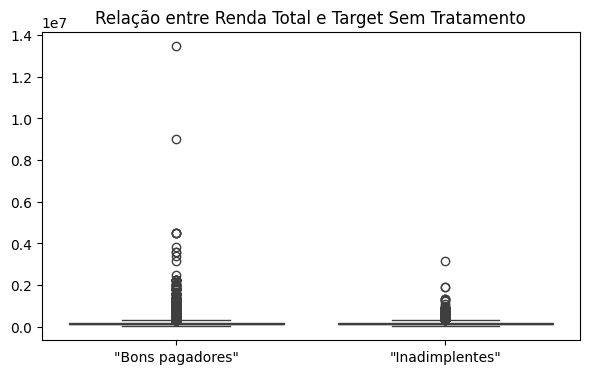

In [48]:
# Filtrar o DataFrame para excluir o valor 1.35E7 na coluna 'AMT_INCOME_TOTAL'
df_application_train_01 = df_application_train_V1[df_application_train_V1['AMT_INCOME_TOTAL'] != 1.35E7]

# Criar o boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_application_train, x='TARGET', y='AMT_INCOME_TOTAL')

# Definir título

plt.title('Relação entre Renda Total e Target Sem Tratamento')

# Remover os títulos dos eixos x e y
plt.xlabel('')
plt.ylabel('')

# Mostrar o gráfico
plt.xticks(ticks=[0, 1], labels=['"Bons pagadores"', '"Inadimplentes"'])
plt.tight_layout()
plt.show()

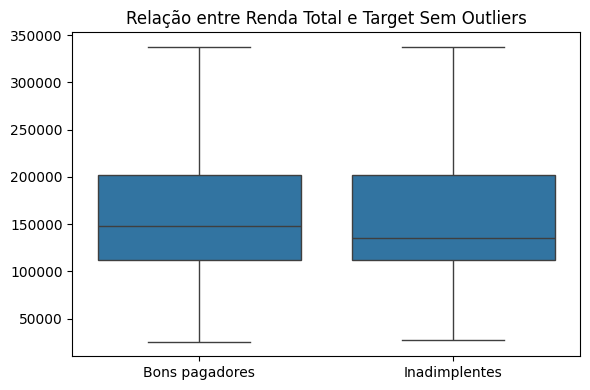

In [50]:
# Filtrar o DataFrame para excluir o valor 1.35E7 na coluna 'AMT_INCOME_TOTAL'
df_application_train_01 = df_application_train_V1[df_application_train_V1['AMT_INCOME_TOTAL'] != 1.35E7]

# Criar o boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_application_train, x='TARGET', y='AMT_INCOME_TOTAL', showfliers=False)

# Definir título

plt.title('Relação entre Renda Total e Target Sem Outliers')

# Remover os títulos dos eixos x e y
plt.xlabel('')
plt.ylabel('')

# Mostrar o gráfico
plt.xticks(ticks=[0, 1], labels=['Bons pagadores', 'Inadimplentes'])
plt.tight_layout()
plt.show()



No primeiro gráfico boxplot, temos a presença de outliers nos clientes classificados como 'Bons pagadores', indicando uma dispersão incomum nos valores de renda total para esse grupo.

No segundo boxplot, após o ajuste e eliminação dos valores atípicos, nota-se que a mediana da renda total dos clientes 'Bons pagadores' está acima da mediana dos clientes 'Inadimplentes'. Isso indica que, em geral, os clientes classificados como 'Bons pagadores' tendem a ter uma renda total mais elevada em comparação com os clientes 'Inadimplentes', conforme mostrado pela posição das medianas nos boxplots.


####Análise da Relação entre Renda Total por faixa e Target

In [54]:
df_renda_target02 = spark.sql("""
select
    t.FAIXA_RENDA,
    TARGET,
    count(*) as QUANT_CLIENTES,
    round(100 * count(*) / TOTAL_CLIENTES_FAIXA, 0) as PORCENTAGEM
from (
    select
        case
            when AMT_INCOME_TOTAL <= 50000 then 'faixa 1: até 50.000'
            when AMT_INCOME_TOTAL <= 100000 then 'faixa 2: 50.001 - 100.000'
            when AMT_INCOME_TOTAL <= 150000 then 'faixa 3: 100.001 - 150.000'
            when AMT_INCOME_TOTAL <= 200000 then 'faixa 4: 150.001 - 200.000'
            else 'faixa 5: mais de 200.000'
        end as FAIXA_RENDA,
        TARGET
    from
        df_application_train_V1
) t
join (
    select
        case
            when AMT_INCOME_TOTAL <= 50000 then 'faixa 1: até 50.000'
            when AMT_INCOME_TOTAL <= 100000 then 'faixa 2: 50.001 - 100.000'
            when AMT_INCOME_TOTAL <= 150000 then 'faixa 3: 100.001 - 150.000'
            when AMT_INCOME_TOTAL <= 200000 then 'faixa 4: 150.001 - 200.000'
            else 'faixa 5: mais de 200.000'
        end as FAIXA_RENDA,
        count(*) as TOTAL_CLIENTES_FAIXA
    from
        df_application_train_V1
    group by
        FAIXA_RENDA
) TOTAL_CLIENTES on t.FAIXA_RENDA = TOTAL_CLIENTES.FAIXA_RENDA
group by
    t.FAIXA_RENDA,
    TARGET,
    TOTAL_CLIENTES_FAIXA
order by
    t.FAIXA_RENDA,
    TARGET;
""")
df_renda_target02.show()

+--------------------+------+--------------+-----------+
|         FAIXA_RENDA|TARGET|QUANT_CLIENTES|PORCENTAGEM|
+--------------------+------+--------------+-----------+
| faixa 1: até 50.000|     0|          2905|       92.0|
| faixa 1: até 50.000|     1|           240|        8.0|
|faixa 2: 50.001 -...|     0|         38123|       92.0|
|faixa 2: 50.001 -...|     1|          3411|        8.0|
|faixa 3: 100.001 ...|     0|         58655|       91.0|
|faixa 3: 100.001 ...|     1|          5526|        9.0|
|faixa 4: 150.001 ...|     0|         40898|       91.0|
|faixa 4: 150.001 ...|     1|          3854|        9.0|
|faixa 5: mais de ...|     0|         57264|       93.0|
|faixa 5: mais de ...|     1|          4381|        7.0|
+--------------------+------+--------------+-----------+



####Visualização da Variável Renda Total por Faixa e a Relação com Target

<Figure size 800x600 with 0 Axes>

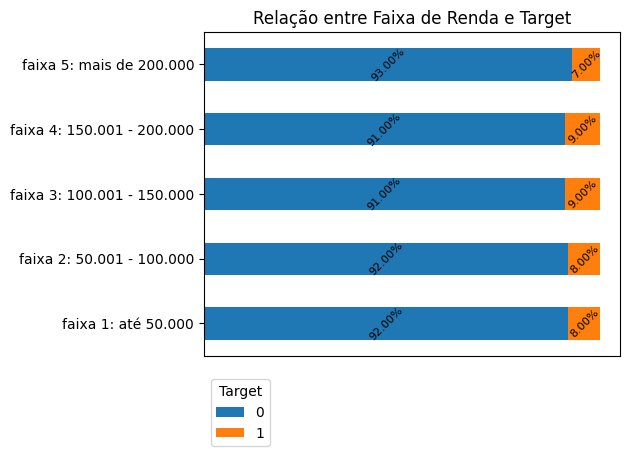

In [55]:
# Converter o DataFrame do Spark para um DataFrame do Pandas
df_pandas = df_renda_target02.toPandas()

# Pivotar os dados para ter as faixas de renda como índices
df_pivot = df_pandas.pivot(index='FAIXA_RENDA', columns='TARGET', values='PORCENTAGEM')

# Criar o gráfico de barras empilhadas 100% horizontal
plt.figure(figsize=(8, 6))
ax = df_pivot.plot(kind='barh', stacked=True)

# Adicionar rótulos de porcentagem nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize= 8, rotation = 45)

# Adicionar título
plt.title('Relação entre Faixa de Renda e Target')

# Remover rótulos do eixo x
plt.xticks([])

# Remover os títulos dos eixos x e y
plt.xlabel('')
plt.ylabel('')

# Exibir a legenda fora do gráfico
plt.legend(title='Target', bbox_to_anchor=(0, -0.3), loc='lower left')

# Exibir o gráfico
plt.tight_layout()
plt.show()

A relação de faixa de renda e inadimplencia permanece flat, sem grandes variações.


###Análise da Variável Posse de Carro pelo Cliente

In [58]:
spark.sql("""
select
    FLAG_OWN_CAR as POSSUI_CARRO,
    count(*) as CLIENTES,
    round(count(*)* 100/ (select count(*)from df_application_train_V1),0) as PORCENTAGEM
from
    df_application_train_V1
group by
    FLAG_OWN_CAR;
""").show()

+------------+--------+-----------+
|POSSUI_CARRO|CLIENTES|PORCENTAGEM|
+------------+--------+-----------+
|           Y|   73425|       34.0|
|           N|  141832|       66.0|
+------------+--------+-----------+



#### Análise da Posse de Carro pelo Cliente e a Relação com Target

In [60]:
df_carro_target = spark.sql("""
select
    TARGET,
    FLAG_OWN_CAR as POSSUI_CARRO,
    count(*) as CLIENTES,
    round(count(*) * 100 / sum(count(*)) over (partition by FLAG_OWN_CAR), 0) as PORCENTAGEM
from
    df_application_train_V1
group by
    TARGET,
    FLAG_OWN_CAR;
""")
df_carro_target.show()

+------+------------+--------+-----------+
|TARGET|POSSUI_CARRO|CLIENTES|PORCENTAGEM|
+------+------------+--------+-----------+
|     0|           N|  129720|       91.0|
|     1|           N|   12112|        9.0|
|     0|           Y|   68125|       93.0|
|     1|           Y|    5300|        7.0|
+------+------------+--------+-----------+



####Visualização da Variável Posse de Carro e a Relação com Target

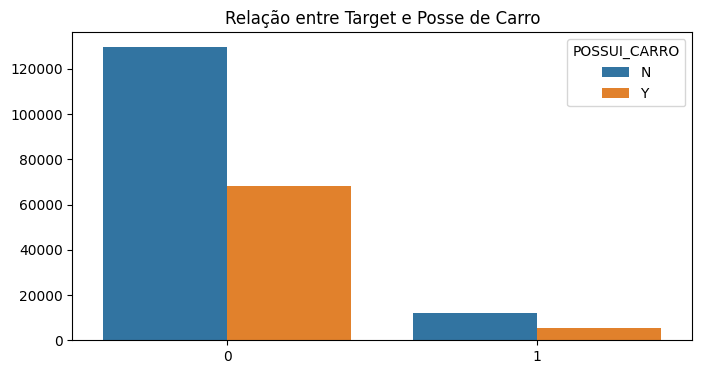

In [61]:
# Converter o DataFrame do Spark para um DataFrame do Pandas
df_carro_target01 = df_carro_target.toPandas()

# Plotar o gráfico de barras
plt.figure(figsize=(8, 4))
sns.barplot(data=df_carro_target01, x='TARGET', y='CLIENTES', hue='POSSUI_CARRO')

# Remover os títulos dos eixos x e y
plt.xlabel('')
plt.ylabel('')

plt.title('Relação entre Target e Posse de Carro')
plt.show()


A posse de carro parece parece não ter influência na variável target.


###Análise da Variável Posse de Imóvel pelo Cliente

In [63]:
spark.sql("""
select
    FLAG_OWN_REALTY as POSSUI_IMOVEL,
    count(*) as CLIENTES,
    round(count(*)* 100/ (select count(*)from df_application_train_V1),0) as PORCENTAGEM
from
    df_application_train
group by
   FLAG_OWN_REALTY;
""").show()

+-------------+--------+-----------+
|POSSUI_IMOVEL|CLIENTES|PORCENTAGEM|
+-------------+--------+-----------+
|            Y|  149519|       69.0|
|            N|   65738|       31.0|
+-------------+--------+-----------+



####Análise da Posse de Imóvel pelo Cliente e a Relação com Target

In [65]:
df_imovel_target = spark.sql("""
select
    TARGET,
    FLAG_OWN_REALTY as POSSUI_IMOVEL,
    count(*) as CLIENTES,
     round(count(*) * 100 / sum(count(*)) over (partition by FLAG_OWN_REALTY), 0) as PORCENTAGEM
from
    df_application_train
group by
    TARGET,
    FLAG_OWN_REALTY;
""")
df_imovel_target.show()


+------+-------------+--------+-----------+
|TARGET|POSSUI_IMOVEL|CLIENTES|PORCENTAGEM|
+------+-------------+--------+-----------+
|     0|            N|   60234|       92.0|
|     1|            N|    5504|        8.0|
|     0|            Y|  137611|       92.0|
|     1|            Y|   11908|        8.0|
+------+-------------+--------+-----------+



####Visualização da Variável Posse de Imóvel pelo Cliente e a Relação com Target

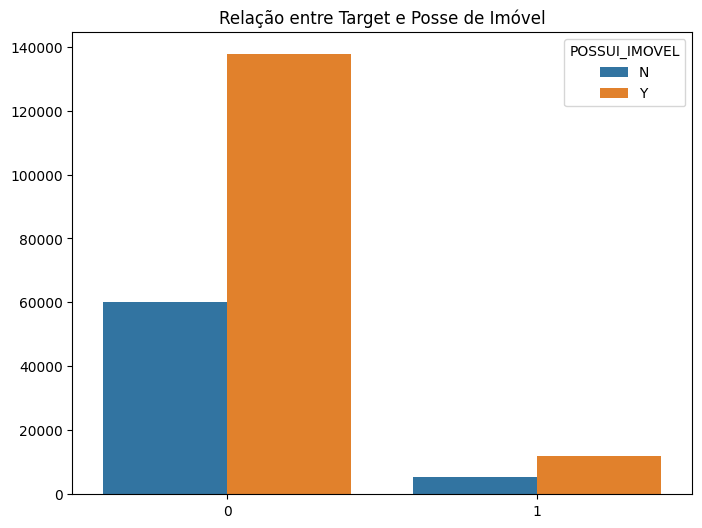

In [66]:
# Converter o DataFrame do Spark para um DataFrame do Pandas
df_imovel_target01 = df_imovel_target.toPandas()

# Plotar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=df_imovel_target01, x='TARGET', y='CLIENTES', hue='POSSUI_IMOVEL')

# Remover os títulos dos eixos x e y
plt.xlabel('')
plt.ylabel('')

plt.title('Relação entre Target e Posse de Imóvel')
plt.show()

Tanto entre os clientes que têm imóvel quanto entre os que não têm, a maioria é classificada como "bons pagadores"


###Análise da Quantidade de Filhos por Cliente

In [69]:
spark.sql("""
select
  CNT_CHILDREN as QUANT_FILHOS,
  count(*) AS QUANT_CLIENTES,
  round(count(*)* 100/ (select count(*)from df_application_train_V1),2) as PORCENTAGEM
from
  df_application_train
group by
  CNT_CHILDREN
order by
  QUANT_FILHOS;
""").show()

+------------+--------------+-----------+
|QUANT_FILHOS|QUANT_CLIENTES|PORCENTAGEM|
+------------+--------------+-----------+
|           0|        150712|      70.01|
|           1|         42855|      19.91|
|           2|         18775|       8.72|
|           3|          2546|       1.18|
|           4|           287|       0.13|
|           5|            54|       0.03|
|           6|            14|       0.01|
|           7|             5|        0.0|
|           8|             1|        0.0|
|           9|             2|        0.0|
|          10|             2|        0.0|
|          11|             1|        0.0|
|          14|             2|        0.0|
|          19|             1|        0.0|
+------------+--------------+-----------+



A maior parte dos clientes (cerca de 70%) na base de dados não possui filhos, enquanto quase 20% têm somente um filho. A quantidade de clientes diminui gradualmente à medida que o número de filhos aumenta, com uma porcentagem muito pequena de clientes (menos de 1,5% no total) tendo três ou mais filhos.

###Análise da Variável Nivel de Educação

In [70]:
spark.sql("""
select
    NAME_EDUCATION_TYPE,
    count (*) as QUANTIDADE_CLIENTES,
    round(count(*) * 100 / (select count(*) from df_application_train), 2) as PORCENTAGEM
from
    df_application_train_V1
group by
    NAME_EDUCATION_TYPE
""").show()

+--------------------+-------------------+-----------+
| NAME_EDUCATION_TYPE|QUANTIDADE_CLIENTES|PORCENTAGEM|
+--------------------+-------------------+-----------+
|     Academic degree|                117|       0.05|
|   Incomplete higher|               7169|       3.33|
|Secondary / secon...|             152634|      70.91|
|     Lower secondary|               2673|       1.24|
|    Higher education|              52664|      24.47|
+--------------------+-------------------+-----------+



A maior parte dos clientes, cerca de 70,91%, possui educação de nível médio (Secondary / secondary special), enquanto uma proporção significativa de 24,47% tem educação superior (Higher education).

Isso indica que a base de clientes é majoritariamente formada por pessoas com formação educacional de nível médio.

#### Análise da Relação entre o Nível de Educação e o Target de Crédito

A consulta a seguir analisa os dados dos clientes, classificando-os conforme o nível de educação e o alvo de crédito. O resultado mostra o número de clientes em cada categoria, bem como a porcentagem em relação ao total de clientes na base de dados.

In [71]:
df_educacao_target = spark.sql("""
select
    NAME_EDUCATION_TYPE,
    TARGET,
    count (*) as QUANTIDADE_CLIENTES,
    round(count(*) * 100 / sum(count(*)) over (partition by NAME_EDUCATION_TYPE), 0) as PORCENTAGEM
from
    df_application_train_V1
group by
    NAME_EDUCATION_TYPE,
    TARGET
order by
    NAME_EDUCATION_TYPE
""")
df_educacao_target.show()


+--------------------+------+-------------------+-----------+
| NAME_EDUCATION_TYPE|TARGET|QUANTIDADE_CLIENTES|PORCENTAGEM|
+--------------------+------+-------------------+-----------+
|     Academic degree|     1|                  3|        3.0|
|     Academic degree|     0|                114|       97.0|
|    Higher education|     1|               2851|        5.0|
|    Higher education|     0|              49813|       95.0|
|   Incomplete higher|     0|               6562|       92.0|
|   Incomplete higher|     1|                607|        8.0|
|     Lower secondary|     1|                289|       11.0|
|     Lower secondary|     0|               2384|       89.0|
|Secondary / secon...|     1|              13662|        9.0|
|Secondary / secon...|     0|             138972|       91.0|
+--------------------+------+-------------------+-----------+



####Visualização da Variável Nivel de Educação para o Target 1

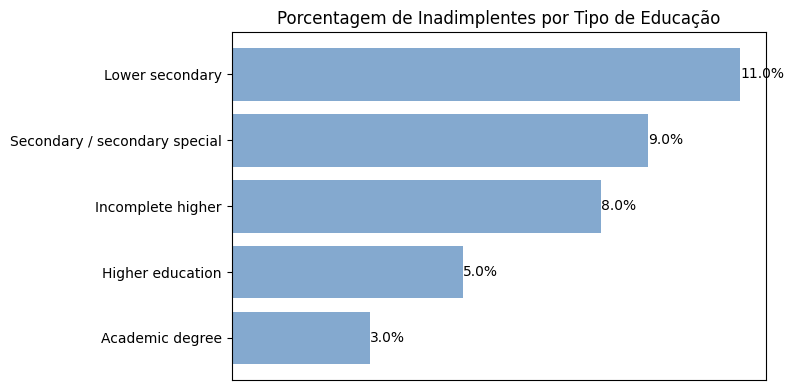

In [72]:
# Converter o resultado da consulta em um DataFrame Pandas
df_pandas = df_educacao_target.toPandas()

# Filtrar apenas os clientes com TARGET 1 (inadimplentes)
df_pandas_target_1 = df_pandas[df_pandas['TARGET'] == 1]

# Ordenar o DataFrame pela coluna 'PORCENTAGEM' em ordem crescente
df_pandas_target_1 = df_pandas_target_1.sort_values(by='PORCENTAGEM')

# Criar o gráfico de barras horizontais
plt.figure(figsize=(8,4))
barras = plt.barh(df_pandas_target_1['NAME_EDUCATION_TYPE'], df_pandas_target_1['PORCENTAGEM'], color='#84A9CF')

# Adicionar a porcentagem como rótulo em cada barra
for barra in barras:
    width = barra.get_width()
    plt.text(width, barra.get_y() + barra.get_height()/2, f'{width}%', ha='left', va='center')

# Adicionar rótulos e título
plt.ylabel('Tipo de Educação')
plt.title('Porcentagem de Inadimplentes por Tipo de Educação')

# Remover os números do eixo x
plt.xticks([])

# Remover o título do eixo y
plt.ylabel('')

# Remover a grade
plt.grid(False)

# Exibir o gráfico
plt.tight_layout()
plt.show()



###Análise da Variavel Quantidade de Membros na Família

In [73]:
spark.sql("""
select
    round(avg(CNT_FAM_MEMBERS),2) as MEDIA_MEMBROS_FAMILIA,
    min(CNT_FAM_MEMBERS) as MIN_MEMBROS_FAMILIA,
    max(CNT_FAM_MEMBERS) as MAX_MEMBROS_FAMILIA
from
    df_application_train_V1
""").show()

+---------------------+-------------------+-------------------+
|MEDIA_MEMBROS_FAMILIA|MIN_MEMBROS_FAMILIA|MAX_MEMBROS_FAMILIA|
+---------------------+-------------------+-------------------+
|                 2.15|                1.0|               20.0|
+---------------------+-------------------+-------------------+



####Análise da Relação da Quantidade de Membros na Família com o  Target

In [74]:
spark.sql("""
select
    TARGET,
    CNT_FAM_MEMBERS as QUANT_MEMBROS,
    count(*) as QUANT_CLIENTES
from
    df_application_train_V1
group by
    TARGET,
    CNT_FAM_MEMBERS
order by
    QUANT_CLIENTES;
""").show()

+------+-------------+--------------+
|TARGET|QUANT_MEMBROS|QUANT_CLIENTES|
+------+-------------+--------------+
|     0|         16.0|             1|
|     0|         15.0|             1|
|     1|         10.0|             1|
|     0|         20.0|             1|
|     0|         10.0|             1|
|     0|         NULL|             1|
|     1|         13.0|             1|
|     1|         11.0|             1|
|     0|         12.0|             2|
|     1|          7.0|             2|
|     1|          8.0|             3|
|     0|          9.0|             4|
|     0|          8.0|            10|
|     1|          6.0|            36|
|     0|          7.0|            51|
|     1|          5.0|           233|
|     0|          6.0|           237|
|     1|          4.0|          1511|
|     0|          5.0|          2156|
|     1|          3.0|          3269|
+------+-------------+--------------+
only showing top 20 rows



A maioria dos clientes tem um número moderado de membros na família, com uma distribuição mais concentrada em torno de 3 a 5 membros.

Observa-se que há uma quantidade significativa de clientes inadimplentes em famílias com um número menor de membros entre 3 e 5 por exemplo.

###Análise da Variável Valor do Crédito

In [75]:
spark.sql("""
select
  round(avg(AMT_CREDIT),2) as MEDIA_CREDITO,
  round(min(AMT_CREDIT),2) as MIN_CREDITO,
  round(max(AMT_CREDIT),2) as MAX_CREDITO
from
  df_application_train_V1
""").show()

+-------------+-----------+-----------+
|MEDIA_CREDITO|MIN_CREDITO|MAX_CREDITO|
+-------------+-----------+-----------+
|     599496.0|    45000.0|  4050000.0|
+-------------+-----------+-----------+



#### Análise por Faixa dos Valores de Crédito e o Target



In [76]:
df_faixa_credito_target = spark.sql("""
select
    TARGET,
    case
        when AMT_CREDIT >= 0 and AMT_CREDIT < 100000 then '0-100k'
        when AMT_CREDIT >= 100000 and AMT_CREDIT < 200000 then '100k-200k'
        when AMT_CREDIT >= 200000 and AMT_CREDIT < 300000 then '200k-300k'
        when AMT_CREDIT >= 300000 and AMT_CREDIT < 400000 then '300k-400k'
        else '400k+'
    end as FAIXA_CREDITO,
    count(*) as QUANT_CLIENTES
from
    df_application_train_V1
group by
    TARGET,
    FAIXA_CREDITO
order by
    TARGET,
    FAIXA_CREDITO
""")

df_faixa_credito_target.show()

+------+-------------+--------------+
|TARGET|FAIXA_CREDITO|QUANT_CLIENTES|
+------+-------------+--------------+
|     0|       0-100k|          3977|
|     0|    100k-200k|         19593|
|     0|    200k-300k|         35449|
|     0|    300k-400k|         16535|
|     0|        400k+|        122291|
|     1|       0-100k|           236|
|     1|    100k-200k|          1500|
|     1|    200k-300k|          3041|
|     1|    300k-400k|          1835|
|     1|        400k+|         10800|
+------+-------------+--------------+



A maioria dos clientes, tanto do target 0 quanto do target 1, está na faixa de crédito de 400k+.

Para o target 0, a segunda faixa de crédito mais comum é a faixa de 200k-300k, seguida pela faixa de 100k-200k.

Para o target 1, a segunda faixa de crédito mais comum é a faixa de 400k+, seguida pela faixa de 200k-300k.


###Análise da Varável valor do Crédito por Faixas de Renda

Por meio da consulta Spark SQL, segmentei os clientes em diferentes faixas de renda, que variam de "Até 50.000" a "Mais de 200.000". Para cada faixa de renda, calculei a média, o mínimo e o máximo dos valores de crédito concedidos.

In [ ]:
df_credito_renda = spark.sql("""
select
   case
      when AMT_INCOME_TOTAL <=  50000 then 'Faixa 1: Até 50.000'
      when AMT_INCOME_TOTAL <= 100000 then 'Faixa 2: 50.001 - 100.000'
      when AMT_INCOME_TOTAL <= 150000 then 'Faixa 3: 100.001 - 150.000'
      when AMT_INCOME_TOTAL <= 200000 then 'Faixa 4: 150.001 - 200.000'
      else 'Faixa 5: Mais de 200.000'
    end  as FAIXA_RENDA,
      round(avg(AMT_CREDIT), 2) as MEDIA_CREDITO,
      round(min(AMT_CREDIT), 2) as MIN_CREDITO,
      round(max(AMT_CREDIT), 2) as MAX_CREDITO
from
    df_application_train_01
group by
    case
      when AMT_INCOME_TOTAL <=  50000 then 'Faixa 1: Até 50.000'
      when AMT_INCOME_TOTAL <= 100000 then 'Faixa 2: 50.001 - 100.000'
      when AMT_INCOME_TOTAL <= 150000 then 'Faixa 3: 100.001 - 150.000'
      when AMT_INCOME_TOTAL <= 200000 then 'Faixa 4: 150.001 - 200.000'
      else 'Faixa 5: Mais de 200.000'
    end
order by
   FAIXA_RENDA;
""")
df_credito_renda.show()

+--------------------+-------------+-----------+-----------+
|         FAIXA_RENDA|MEDIA_CREDITO|MIN_CREDITO|MAX_CREDITO|
+--------------------+-------------+-----------+-----------+
| Faixa 1: Até 50.000|    295648.85|    45000.0|  2215224.0|
|Faixa 2: 50.001 -...|    393857.73|    45000.0|  2517300.0|
|Faixa 3: 100.001 ...|    521020.04|    45000.0|  2517300.0|
|Faixa 4: 150.001 ...|    635453.73|    45000.0|  2980521.0|
|Faixa 5: Mais de ...|    809149.07|    45000.0|  4050000.0|
+--------------------+-------------+-----------+-----------+



####Visualização da Variável Valor do Credito por Faixa de Renda

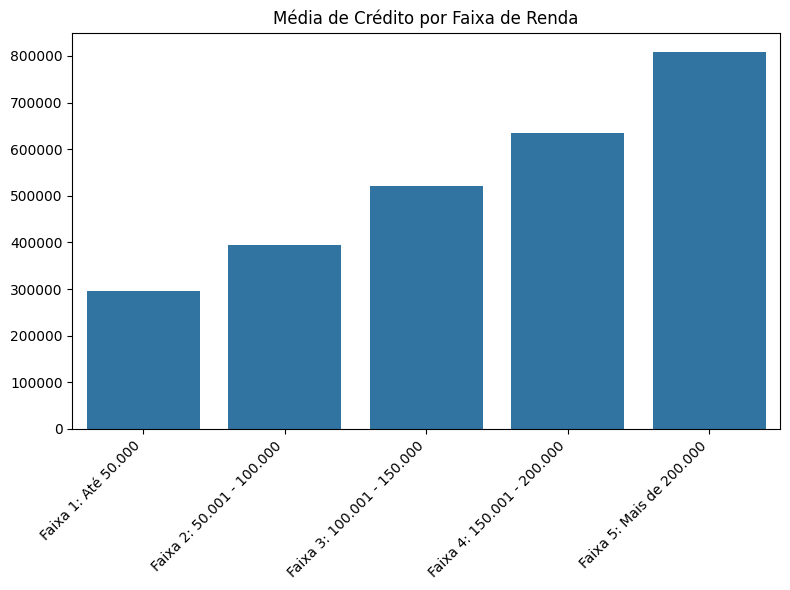

In [ ]:
# Converter os resultados da consulta para um DataFrame Pandas
df_credito_renda01 = df_credito_renda.toPandas()

# Configurar o gráfico de barras
plt.figure(figsize=(8, 6))

sns.barplot(data=df_credito_renda01, x='FAIXA_RENDA', y='MEDIA_CREDITO')
plt.title('Média de Crédito por Faixa de Renda')

# Remover os títulos dos eixos x e y
plt.xlabel('')
plt.ylabel('')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Observa-se que, em geral, o valor médio do crédito aumenta à medida que a faixa de renda aumenta.

Embora exista um aumento geral no valor médio do crédito à medida que a faixa de renda aumenta, a variação nos valores mínimos e máximos de crédito é significativa dentro de cada faixa de renda.

###Análise da Parcela Mensal do Crédito

In [77]:
spark.sql("""
select
  round(avg(AMT_ANNUITY)/12,2) as MED_PARC_MENSAL,
  round(min(AMT_ANNUITY)/12,2) as MIN_PARC_MENSAL,
  round(max(AMT_ANNUITY)/12,2) as MAX_PARC_MENSAL
from
  df_application_train_V1
""").show()

+---------------+---------------+---------------+
|MED_PARC_MENSAL|MIN_PARC_MENSAL|MAX_PARC_MENSAL|
+---------------+---------------+---------------+
|        2259.97|         134.63|       21502.13|
+---------------+---------------+---------------+



###Análise da Variável Tipo de Renda do Cliente

In [78]:
spark.sql("""
select
  NAME_INCOME_TYPE,
  count(*) as TIPO_RENDA,
  round((count(*) / sum(count(*)) over()) * 100,2) as PORCENTAGEM
from
  df_application_train_V1
group by
  NAME_INCOME_TYPE
order by
  TIPO_RENDA
""").show()

+--------------------+----------+-----------+
|    NAME_INCOME_TYPE|TIPO_RENDA|PORCENTAGEM|
+--------------------+----------+-----------+
|     Maternity leave|         2|        0.0|
|         Businessman|         8|        0.0|
|             Student|        14|       0.01|
|          Unemployed|        16|       0.01|
|       State servant|     15207|       7.06|
|           Pensioner|     38709|      17.98|
|Commercial associate|     50219|      23.33|
|             Working|    111082|       51.6|
+--------------------+----------+-----------+



####Análise da Variável Tipo de Renda e a Relação com Target

In [79]:
df_tipo_renda_target = spark.sql("""
select
  TARGET,
  NAME_INCOME_TYPE as TIPO_RENDA,
  count(*) as QUANT_CLIENTES
from
  df_application_train_V1
group by
  TARGET,
  NAME_INCOME_TYPE
order by
  QUANT_CLIENTES;
""")
df_tipo_renda_target.show()

+------+--------------------+--------------+
|TARGET|          TIPO_RENDA|QUANT_CLIENTES|
+------+--------------------+--------------+
|     1|     Maternity leave|             1|
|     0|     Maternity leave|             1|
|     1|          Unemployed|             6|
|     0|         Businessman|             8|
|     0|          Unemployed|            10|
|     0|             Student|            14|
|     1|       State servant|           877|
|     1|           Pensioner|          2091|
|     1|Commercial associate|          3812|
|     1|             Working|         10625|
|     0|       State servant|         14330|
|     0|           Pensioner|         36618|
|     0|Commercial associate|         46407|
|     0|             Working|        100457|
+------+--------------------+--------------+



####Visualização da Variável Tipo de Renda e o Target

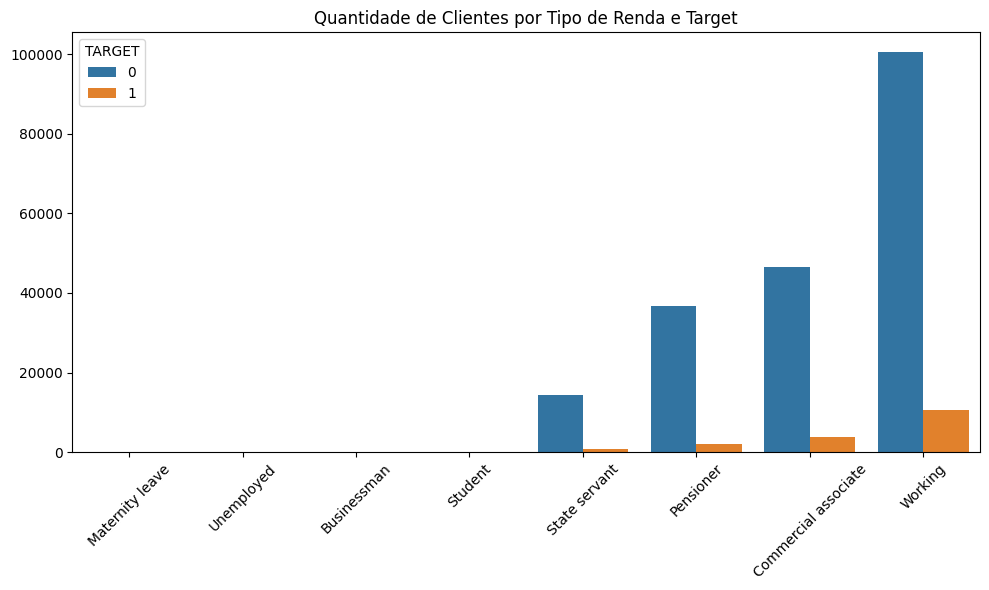

In [80]:
# Converta os resultados para um DataFrame pandas
df_tipo_renda_target01 = df_tipo_renda_target.toPandas()

# Crie o gráfico de barras agrupado
plt.figure(figsize=(10, 6))
sns.barplot(data=df_tipo_renda_target01, x='TIPO_RENDA', y='QUANT_CLIENTES', hue='TARGET')

# Adicione título
plt.title('Quantidade de Clientes por Tipo de Renda e Target')

# Remover os títulos dos eixos x e y
plt.xlabel('')
plt.ylabel('')

# Mostrar o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='TARGET')
plt.show()

A maioria dos clientes pertence ao grupo "Working" tanto para target 0 quanto para target 1.

A segunda maior quantidade de clientes inadimplentes (target 1) é dos que têm a ocupação de "Commercial associate".

Clientes com ocupações como "State servant" e "Pensioner" têm menos chances de serem inadimplentes em comparação com outras ocupações.

Há uma quantidade muito pequena de clientes com ocupações especiais como "Maternity leave", "Unemployed" e "Businessman", e o número de inadimplentes dentro desses grupos também é baixo.

###Análise da Variável Pontuação de Fonte de Dados Externos

In [81]:
spark.sql("""
select
    avg(EXT_SOURCE_1) as media_EXT_SOURCE_1,
    avg(EXT_SOURCE_2) as media_EXT_SOURCE_2,
    avg(EXT_SOURCE_3) as media_EXT_SOURCE_3,
    max(EXT_SOURCE_1) as max_EXT_SOURCE_1,
    max(EXT_SOURCE_2) as max_EXT_SOURCE_2,
    max(EXT_SOURCE_3) as max_EXT_SOURCE_3,
    min(EXT_SOURCE_1) as min_EXT_SOURCE_1,
    min(EXT_SOURCE_2) as min_EXT_SOURCE_2,
    min(EXT_SOURCE_3) as min_EXT_SOURCE_3
from
df_application_train_V1

""").show()

+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+-----------------+
|media_EXT_SOURCE_1|media_EXT_SOURCE_2|media_EXT_SOURCE_3|  max_EXT_SOURCE_1|  max_EXT_SOURCE_2|  max_EXT_SOURCE_3|  min_EXT_SOURCE_1|    min_EXT_SOURCE_2| min_EXT_SOURCE_3|
+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+-----------------+
|0.5023237059767551|0.5141921034667131|0.5110699709936147|0.9516239622079844|0.8549996664047012|0.8960095494948396|0.0145681324124455|8.173616518884397E-8|5.272652387098E-4|
+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+-----------------+



####Correlação da Variável Pontuação de Fonte de Dados Externos com o Target

In [82]:
df_correlation = spark.sql("""
select
  corr(EXT_SOURCE_1, TARGET) as correlation_EXT_SOURCE_1,
  corr(EXT_SOURCE_2, TARGET) as correlation_EXT_SOURCE_2,
  corr(EXT_SOURCE_3, TARGET) as correlation_EXT_SOURCE_3
from
  df_application_train_V1
""")
df_correlation.show()

+------------------------+------------------------+------------------------+
|correlation_EXT_SOURCE_1|correlation_EXT_SOURCE_2|correlation_EXT_SOURCE_3|
+------------------------+------------------------+------------------------+
|    -0.15491233954514788|     -0.1597761566994234|    -0.17989774535126316|
+------------------------+------------------------+------------------------+



 Esses resultados de correlação indicam uma relação fraca entre as variáveis EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 e o alvo TARGET, o que significa que essas variáveis não estão fortemente relacionadas à variável TARGET

####Visualização da Variável Pontuação de Fonte de Dados Externos

 Crie um histograma para cada variável EXT_SOURCE_1, EXT_SOURCE_2 e EXT_SOURCE_3. Os histogramas ajudam a visualizar a distribuição de cada variável.

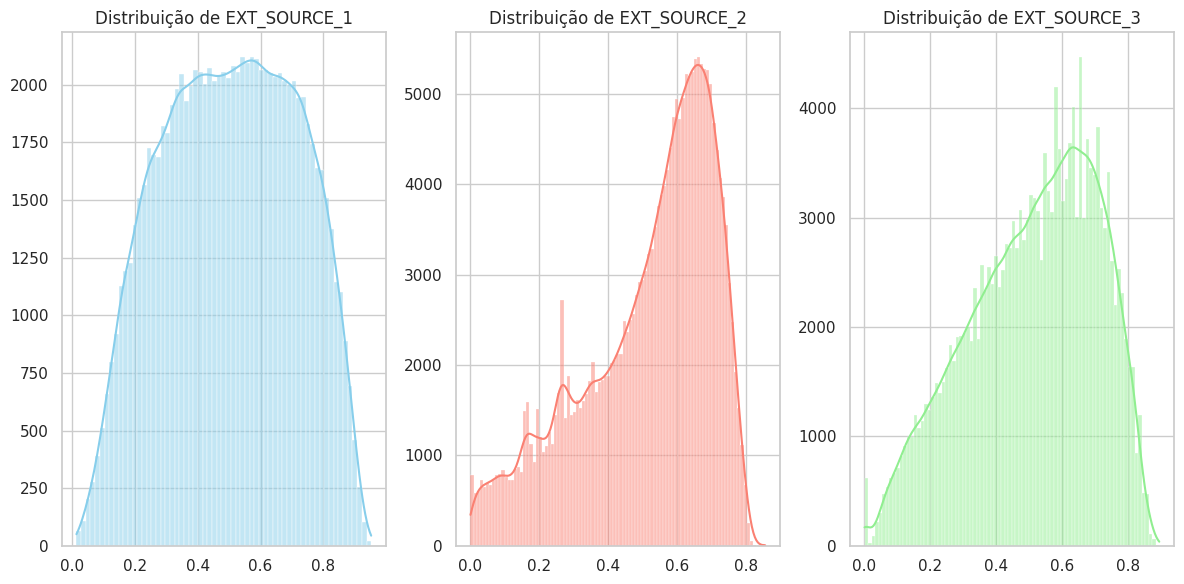

In [83]:
# Definir o estilo do seaborn
sns.set(style="whitegrid")

# Definir o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Histograma para EXT_SOURCE_1
plt.subplot(1, 3, 1)
sns.histplot(data=df_application_train_01, x='EXT_SOURCE_1', kde=True, color='skyblue')
plt.title('Distribuição de EXT_SOURCE_1')
plt.xlabel('')
plt.ylabel('')

# Histograma para EXT_SOURCE_2
plt.subplot(1, 3, 2)
sns.histplot(data=df_application_train_01, x='EXT_SOURCE_2', kde=True, color='salmon')
plt.title('Distribuição de EXT_SOURCE_2')
plt.xlabel('')
plt.ylabel('')

# Histograma para EXT_SOURCE_3
plt.subplot(1, 3, 3)
sns.histplot(data=df_application_train_01, x='EXT_SOURCE_3', kde=True, color='lightgreen')
plt.title('Distribuição de EXT_SOURCE_3')
plt.xlabel('')
plt.ylabel('')

# Mostrar os gráficos
plt.tight_layout()
plt.show()
